In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Initialize parameters
S0 = 100      # initial stock price
K = 100       # strike price
T = 1.0       # time to maturity
r = 0.05      # risk-free rate
sigma = 0.2   # volatility
M = 100       # number of time steps
dt = T / M    # time interval
I = 10000     # number of simulation paths

In [18]:
# Heston parameters
kappa = 2.0   # rate of reversion
theta = 0.2   # long-term volatility
xi = 0.1      # volatility of volatility
rho = -0.5    # correlation between Brownian motions

# GBM Implementation

In [14]:
# Simulating I paths with M time steps
np.random.seed(0)
Z = np.random.standard_normal((M + 1, I))
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z[t])


In [15]:
# Calculating the Monte Carlo estimator
C0 = np.exp(-r * T) * np.sum(np.maximum(S[-1] - K, 0)) / I

In [16]:
# Output the results
print("European Option Value: ", C0)

European Option Value:  10.50622954570852


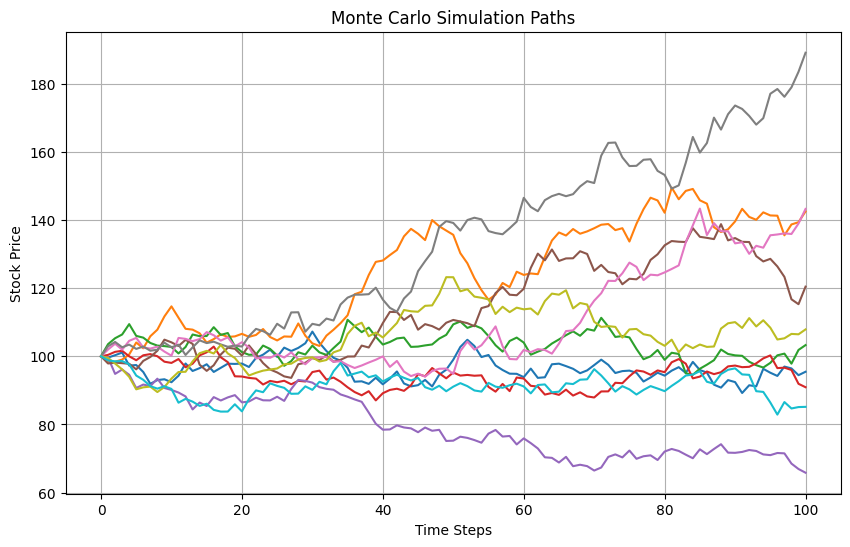

In [17]:
# Plotting some simulation paths
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10])
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('Monte Carlo Simulation Paths')
plt.grid(True)
plt.show()

# Heston Model

In [19]:
# Initialize stock and variance levels
S = np.zeros((M + 1, I))
v = np.zeros((M + 1, I))
S[0] = S0
v[0] = theta

In [21]:
# Correlated random sequences
np.random.seed(0)
Z1 = np.random.standard_normal((M + 1, I))
Z2 = rho * Z1 + np.sqrt(1 - rho**2) * np.random.standard_normal((M + 1, I))

In [22]:
# Monte Carlo simulation
for t in range(1, M + 1):
    v[t] = np.abs(v[t - 1] + kappa * (theta - v[t - 1]) * dt + xi * np.sqrt(v[t - 1]) * np.sqrt(dt) * Z1[t])
    S[t] = S[t - 1] * np.exp((r - 0.5 * v[t]) * dt + np.sqrt(v[t]) * np.sqrt(dt) * Z2[t])

In [23]:
# Calculate option price
C0 = np.exp(-r * T) * np.sum(np.maximum(S[-1] - K, 0)) / I

print("European Option Value: ", C0)

European Option Value:  17.855796259808347


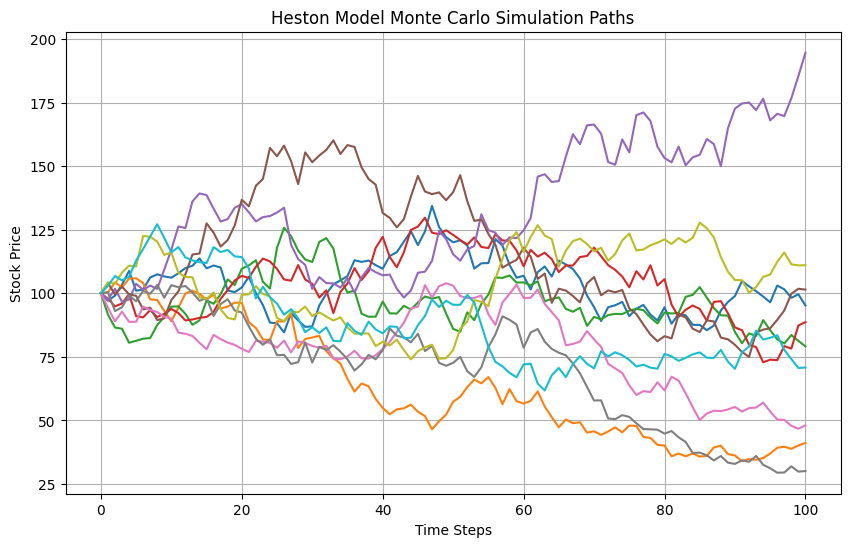

In [24]:
# Plotting some simulation paths
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10])
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('Heston Model Monte Carlo Simulation Paths')
plt.grid(True)
plt.show()